In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from ydata_profiling import ProfileReport
# from xgboost import  XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

C:\Users\LLeavee\AppData\Local\Temp\ipykernel_21404\2635565255.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


# Data Collection and Processing

In [2]:
# Loading the Csv
heart_data = pd.read_csv("D:\CODE\Python\Data_mining\job\heart.csv")

In [3]:
# Print the first 5 example
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_data.shape

(1025, 14)

In [5]:
# Print the last 5 example
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
# Number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# Checking for missing  value
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# checking the distribution of the target variable
heart_data["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

In [11]:
# ProfileReport(heart_data)

* 1 ---> Defective Heart
* 0 ---> Healthy Heart

## Splitting the Features and Target

In [12]:
X = heart_data.drop(columns="target", axis=1)
Y = heart_data["target"]

In [13]:
X.shape, Y.shape

((1025, 13), (1025,))

Splitting the Data into Training & Test Data 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=50
)

In [15]:
# StandardScaler is used to scale the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [16]:
X.shape, X_train.shape, X_test.shape

((1025, 13), (820, 13), (205, 13))

In [17]:
Y.shape, y_train.shape, y_test.shape

((1025,), (820,), (205,))

# Model Training

In [18]:
def confusion_matrix_plot(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [19]:
def roc(clf):
    # roc curve for Random Forest
    # Binarize the output
    y_true = label_binarize(y_test, classes=[0, 1])
    y_score = clf.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area for each class
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    # roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc

## Logistic Regression

Accuracy on Training data:  85.36585365853658
Accuracy on Test data:  85.36585365853658


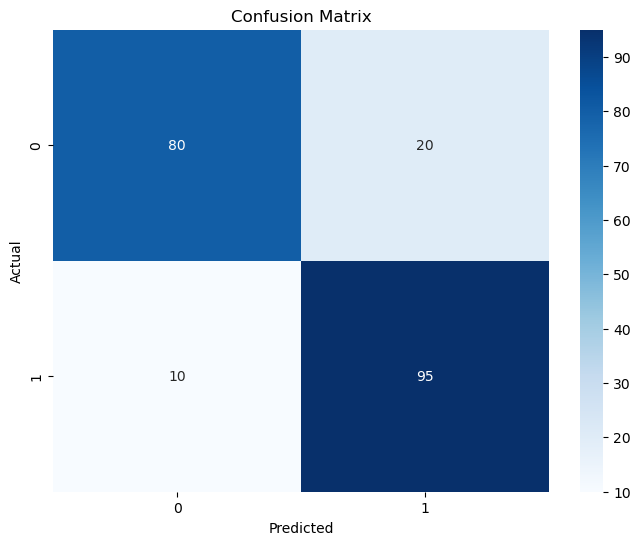

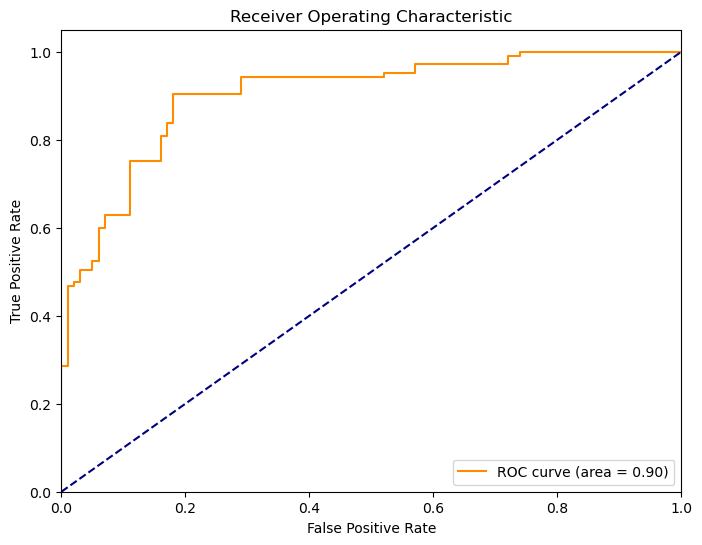

In [20]:
m1 = "Logistic Regression"

lr_model = LogisticRegression(solver="liblinear", random_state=50)
# training the model with training data
lr_model.fit(X_train, y_train)

# Accuracy on training data
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print(f"Accuracy on Training data: ", training_data_accuracy * 100)
# Accuracy on test data
X_test_prediction = lr_model.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ", test_data_accuracy_lr * 100)

# Confussion matrix
confusion_matrix_plot(y_test, X_test_prediction)

# roc curve for logistic regression
roc_auc_lr = roc(lr_model)

## Naive Bayes

Accuracy on Training data:  83.53658536585365
Accuracy on Test data:  82.92682926829268


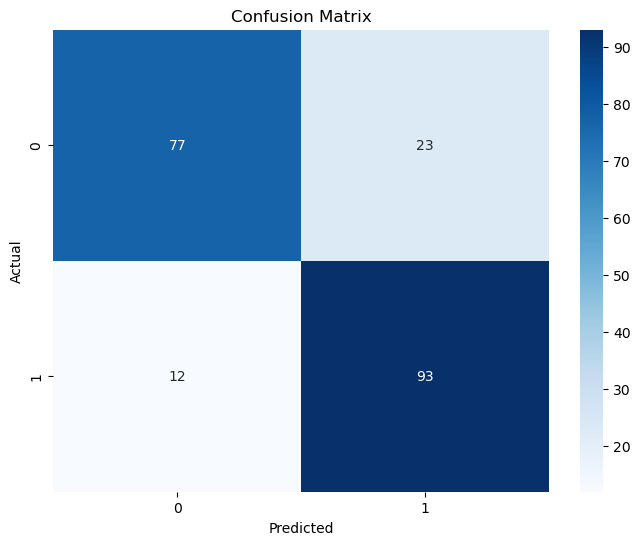

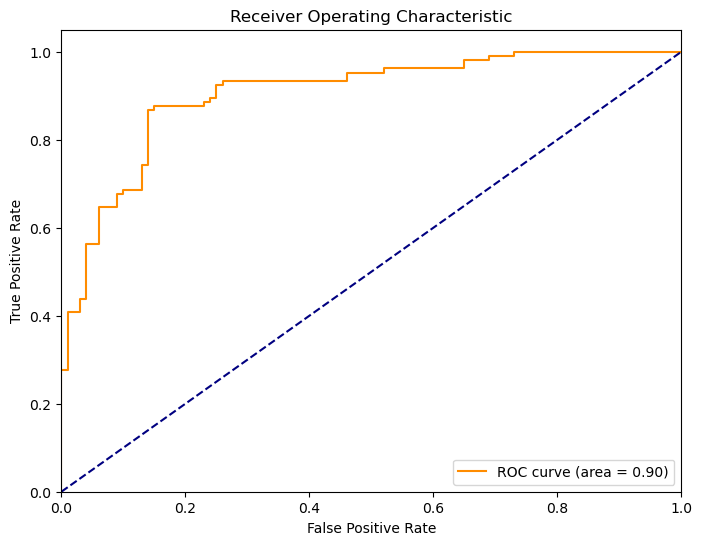

In [21]:
m2 = "Naive Bayes"

nb = GaussianNB()
# training the model with training data
nb.fit(X_train, y_train)

# Accuracy on training data
X_train_prediction = nb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print(f"Accuracy on Training data: ", training_data_accuracy * 100)
# Accuracy on test data
X_test_prediction = nb.predict(X_test)
test_data_accuracy_nb = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ", test_data_accuracy_nb * 100)

# Confussion matrix
confusion_matrix_plot(y_test, X_test_prediction)

# roc curve for Naive Bayes
roc_auc_nb = roc(nb)

## Random Forest

Accuracy on Training data:  99.02439024390245
Accuracy on Test data:  94.6341463414634


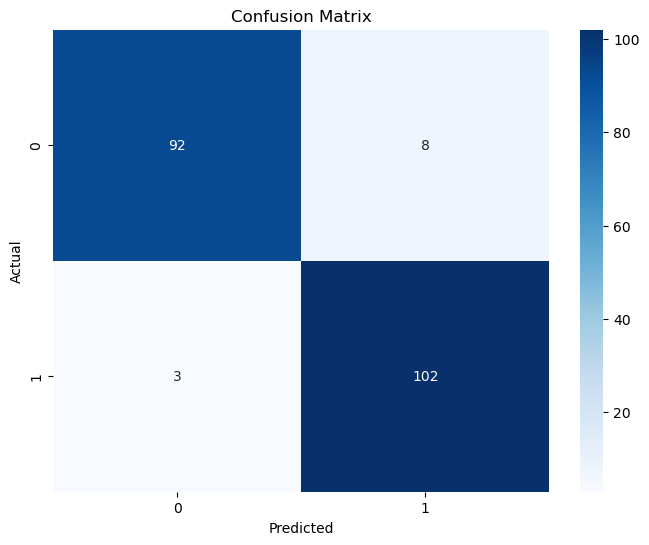

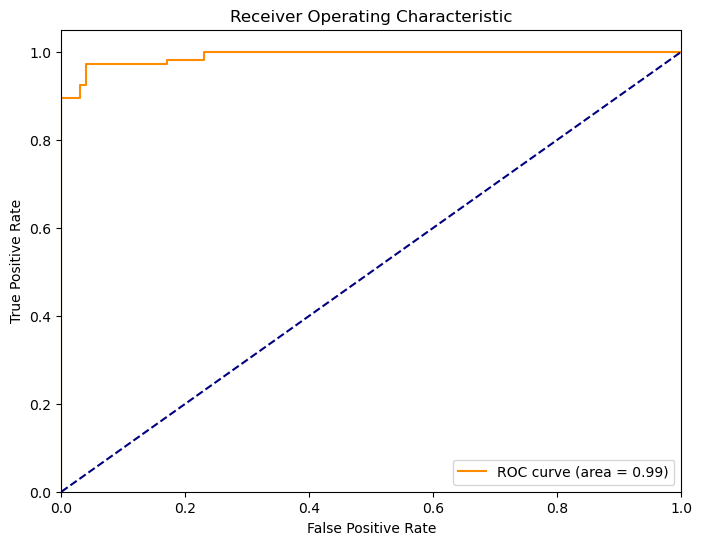

In [22]:
m3 = "Random Forest"

rf = RandomForestClassifier(
    n_estimators=100,
    criterion="entropy",
    max_depth=7,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=50,
)
# training the model with training data
rf.fit(X_train, y_train)

# Accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print(f"Accuracy on Training data: ", training_data_accuracy * 100)
# Accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ", test_data_accuracy_rf * 100)

# Confussion matrix
confusion_matrix_plot(y_test, X_test_prediction)

# roc curve for Random Forest
roc_auc_rf = roc(rf)

## K-Neighbour

Accuracy on Training data:  87.07317073170732
Accuracy on Test data:  86.34146341463415


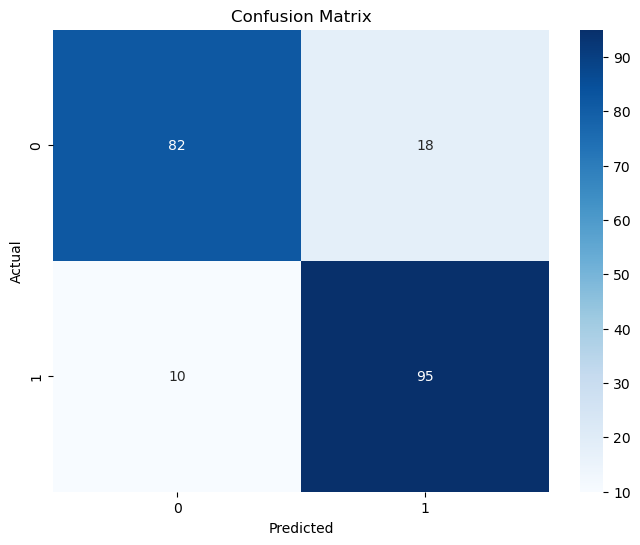

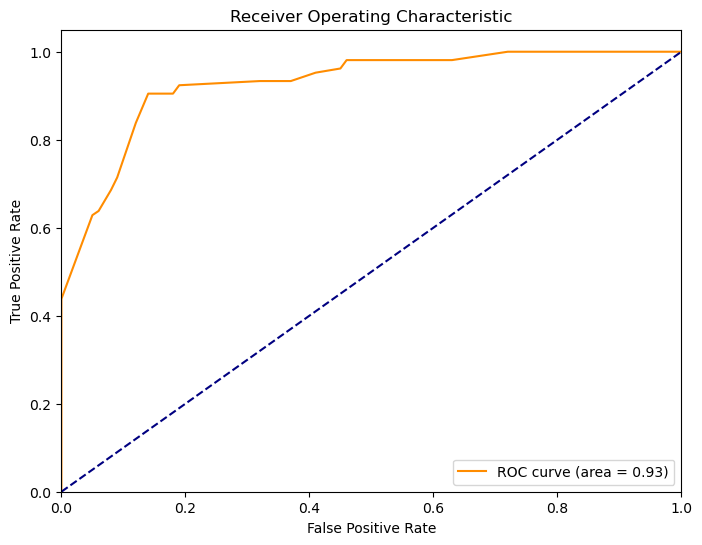

In [23]:
m5 = "K-Neighbour"

knn = KNeighborsClassifier(n_neighbors=20, algorithm="auto")
# train on the training set
knn.fit(X_train, y_train)

# Accuracy on training data
X_train_predict = knn.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ", training_data_accuracy * 100)
# Accuracy on test data
X_test_predict = knn.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ", test_data_accuracy_knn * 100)

# Confussion matrix
confusion_matrix_plot(y_test, X_test_predict)

# roc curve for K-Neighbour
roc_auc_knn = roc(knn)

## svc

Accuracy on Training data:  98.41463414634146
Accuracy on Test data:  95.60975609756098


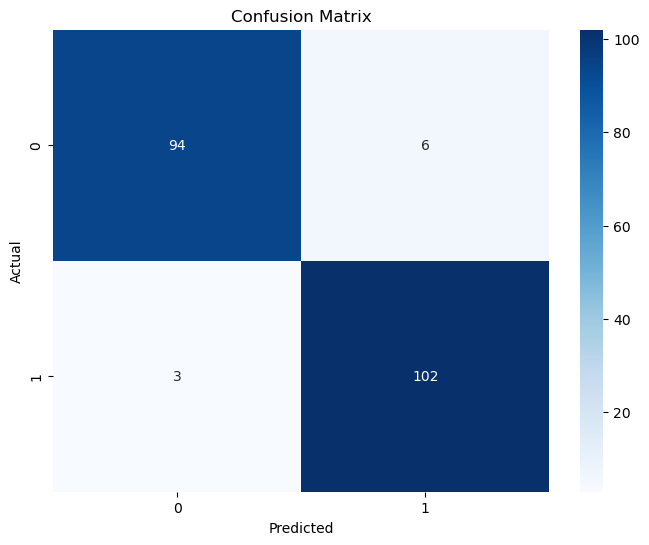

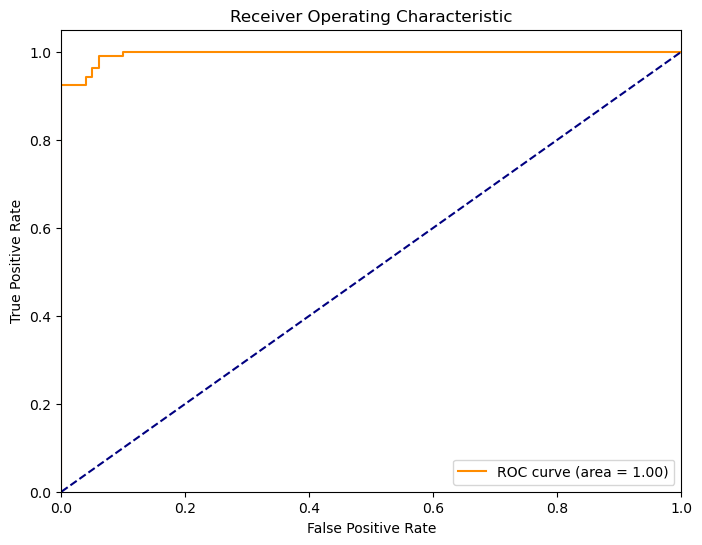

In [24]:
m7 = "svc"

svc = SVC(C=5, kernel="rbf", probability=True)
# train on the training set
svc.fit(X_train, y_train)

# Accuracy on training data
X_train_predict = svc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ", training_data_accuracy * 100)
# Accuracy on test data
X_test_predict = svc.predict(X_test)
test_data_accuracy_svc = accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ", test_data_accuracy_svc * 100)

# Confussion matrix
confusion_matrix_plot(y_test, X_test_predict)

# roc curve for svc
roc_auc_svc = roc(svc)

## Results

In [25]:
results = {
    "Models": [m1, m2, m3, m5, m7],
    "Accuracy": [
        test_data_accuracy_lr,
        test_data_accuracy_nb,
        test_data_accuracy_rf,
        test_data_accuracy_knn,
        test_data_accuracy_svc,
    ],
    "Roc": [
        roc_auc_lr, 
        roc_auc_nb, 
        roc_auc_rf, 
        roc_auc_knn, 
        roc_auc_svc
    ],
}

for key, value in results.items():
    if key == "Accuracy":
        results[key] = [item * 100 for item in results[key]]

for key, value in results.items():
    if key == "Roc":
        results[key] = [item * 100 for item in results[key]]

result_df = pd.DataFrame(results)

In [26]:
result_df

,Models,Accuracy,Roc
0,Logistic Regression,85.365854,90.238095
1,Naive Bayes,82.926829,90.428571
2,Random Forest,94.634146,99.123810
3,K-Neighbour,86.341463,92.828571
4,svc,95.609756,99.561905


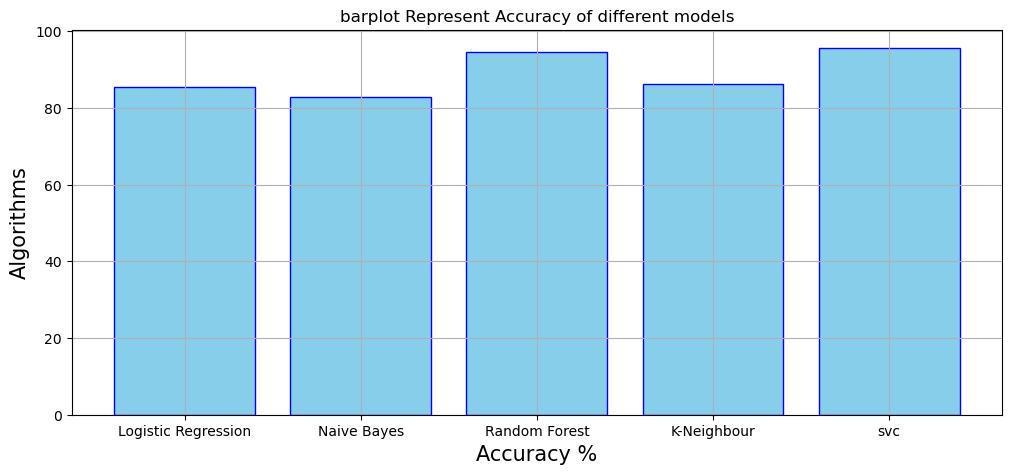

In [27]:
plt.figure(figsize=(12, 5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %", fontsize=15)
plt.ylabel("Algorithms", fontsize=15)
plt.bar(result_df["Models"], result_df["Accuracy"], color='skyblue', edgecolor='blue')
plt.grid(True)
plt.show()

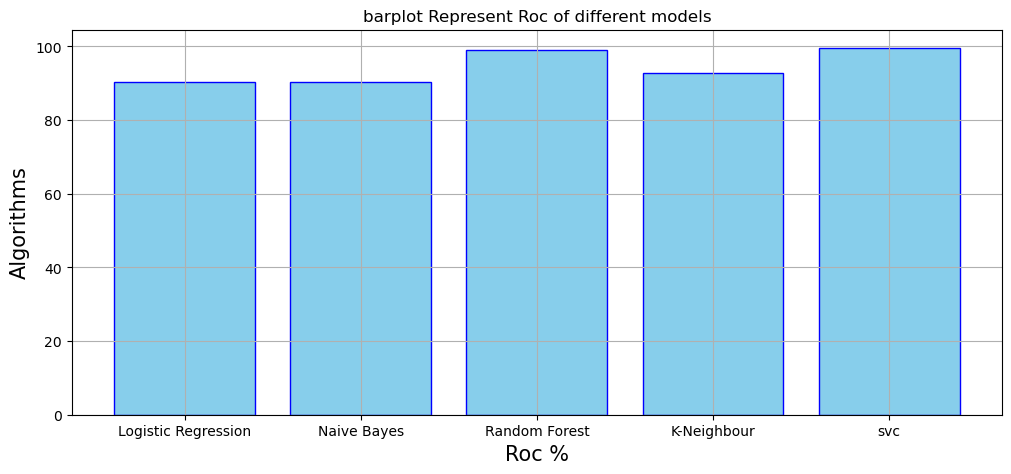

In [28]:
plt.figure(figsize=(12, 5))
plt.title("barplot Represent Roc of different models")
plt.xlabel("Roc %", fontsize=15)
plt.ylabel("Algorithms", fontsize=15)
plt.bar(result_df["Models"], result_df["Roc"], color='skyblue', edgecolor='blue')
plt.grid(True)
plt.show()